# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset

from collections import Counter

display(data.describe())

#Average values, and their indexes
print('Close to average and its indexes')
Reducer=36
#display(np.mean(data))
avg_values=np.where((data/Reducer).astype(np.int64) == (np.mean(data)/Reducer).astype(np.int64))
display(list(zip(avg_values[0], avg_values[1])))

#Minimum values, and their indexes
print('Minimum and its indexes')
#display(np.amin(data))
min_values=np.where(data == np.amin(data))
min_values=list(zip(min_values[0], min_values[1]))
print(min_values)
# For later treatment of outliers:
indices_as_min = Counter([tup[0] for tup in min_values])

#Maximum values, and their indexes
print('Maximum and its indexes')
#display(np.amax(data))
max_values=np.where(data == np.amax(data))
max_values=list(zip(max_values[0], max_values[1]))
print(max_values)
# For later treatment of outliers:
indices_as_max = Counter([tup[0] for tup in max_values])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Close to average and its indexes


[(13, 3), (111, 5), (136, 5), (263, 4), (290, 5), (306, 5), (328, 5), (419, 5)]

Minimum and its indexes
[(75, 2), (75, 4), (95, 0), (109, 5), (128, 5), (142, 5), (154, 1), (161, 4), (187, 5), (338, 0), (420, 3)]
Maximum and its indexes
[(85, 2), (85, 4), (86, 1), (181, 0), (183, 5), (325, 3)]


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset

# Proposing indices that are not outliers:
Reducer=0.5
Percentile = 75
for row in range(data.shape[0]):
    #print('Row ', row)
    Q_fulfilled=1
    for feature in data.keys():
        Q = np.percentile(data[feature], Percentile)
        if abs(np.log(data.loc[row].loc[feature]) - np.log(Q)) < Reducer:
            continue
        else:
            Q_fulfilled=0
            break
            
    if Q_fulfilled==1:
        print('Proposing indices that are not outliers:')
        print('Entire indice close to percentile', Percentile, 'at row=', row)
        print(data.loc[row], '\n')
        break

      
indices = [192,104,426]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Proposing indices that are not outliers:
Entire indice close to percentile 75 at row= 426
Fresh               13134
Milk                 9347
Grocery             14316
Frozen               3141
Detergents_Paper     5079
Delicatessen         1894
Name: 426, dtype: int64 

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5509,1461,2251,547,187,409
1,14100,2132,3445,1336,1491,548
2,13134,9347,14316,3141,5079,1894


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

In [4]:
print('Mean values:')
display(np.mean(data))

print('Offset from mean:')
display(-(np.around(data.mean().values)-samples))

Mean values:


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Offset from mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-6491.0,-4335.0,-5700.0,-2525.0,-2694.0,-1116.0
1,2100.0,-3664.0,-4506.0,-1736.0,-1390.0,-977.0
2,1134.0,3551.0,6365.0,69.0,2198.0,369.0


Sample[0] is an example of customer that purchase close to the 25% percentile on every product. 
    * This is a small shop, not specialized on any specific products.

Sample [1] is an example of customer that buy close to average on every products, still higher on Fresh and lower on Grocery
    * This may be a restaurant.

Sample [2] is an example of customer that purchase close to the 75% percentile on every product, but Fresh, Frozen and Deliactessen is not very high
    * This may be a chain of convenience stores.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Train on  Fresh
Score on test data:  -11.532806498765602 %


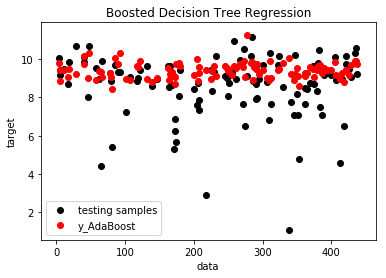

In [5]:
### TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
Col_index=0
print("Train on ", data.columns[Col_index])

new_data = data.drop(data.columns[Col_index], axis=1)


# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

y=data[data.columns[Col_index]]
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=1)


# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),n_estimators=300, random_state=1)
regressor.fit(X_train, y_train)


# TODO: Report the score of the prediction using the testing set
score=regressor.score(X_test,y_test)
print('Score on test data: ', score*100,'%')

import matplotlib.pyplot as plt

y_AdaBoost = regressor.predict(X_test)
plt.figure()
plt.scatter(X_test.index, np.log(y_test), c="k", label="testing samples")
plt.scatter(X_test.index, np.log(y_AdaBoost), c="r", label="y_AdaBoost")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Prediction scores, with respect to each of the features:

        Fresh | -12%
        Milk | 61%
        Grocery | 88%
        Frozen | 1%
        Detergents_Paper | 87%
        Delicatessen | -5%

* I selected to predict Fresh, wich has the most unique impact
* This is seen from the negative score of -12%. 
* This feature "Fresh" is highly needed for identifying spending habits (Features that may be the most correlated within the dataset, are Grocery and Detergents_Paper)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

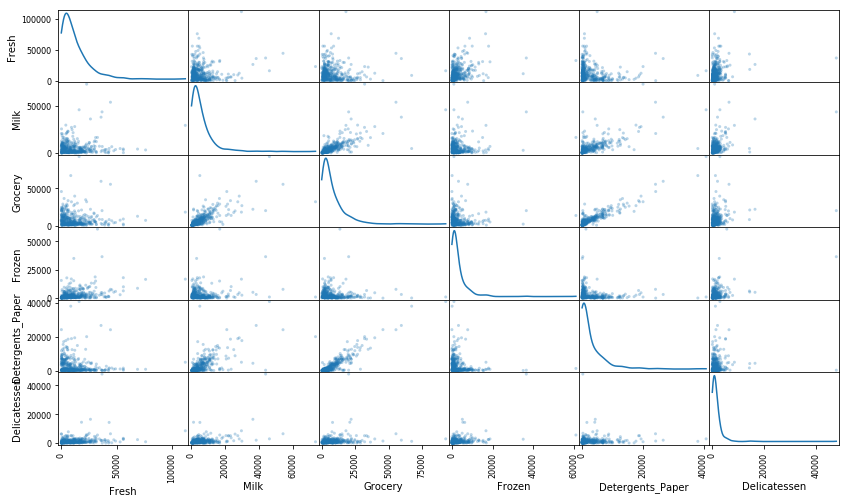

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

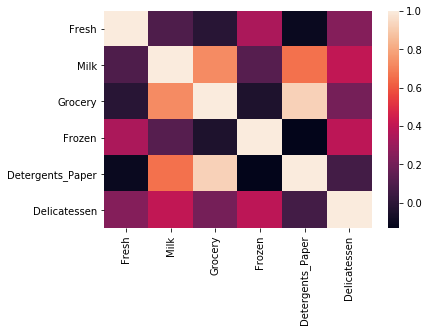

In [7]:
import seaborn as sns; 
ax = sns.heatmap(data.corr(method='pearson'))

**Answer:**

Distribution:
* normality: 
    - Each feature has a right-skewed normal distribution (towards zero), due to a few extreme outliers.
* outliers
    - There are not very many outliers compared to the "core" of each scatter plaot. Some of the ouliers do not follow the internal pattern in the scatter plot, and are subject for removing.
    - Outliers seem to follow the same pattern for each product, most propably do these outliers come from the same customer. 
    - Example: There are more outliers in the upper left corner in the row with Detergent_Paper.
    - Especially Frozen and Delikatessen have extreme outliers, that seem to skew their distribution and dim the evidence of patterns in their scatter plot.
* large number of data points near 0: 
    - Outliers close to 0 is almost impossible to see on this scatter plot with linear scala. A logarithmic scala would visualize this better.
    - It seems to me that many customers are specialized on a few of the product categories, hence buying few items of most of the products that they don't specialize on (or, if profitable, buys from a concurrent wholeseller). This is a proof of good adaption to the market situation, so that NOT ALL points close to 0 should be viewed as outliers.

Correlation
* These 3 pairs of products have a more elliptic scatter plot than others, meaning they have high and positive correation to eachother: 
    - Milk + Grocery  |  Milk + Detergent_Paper  |  Grocery + Detergent_Paper
    - I guess that in a 3D scatterplot, Milk + Grocery + Detergent_Paper  would form a bolt through the space
* These pairs of products have a particular well spread scatter plot, meaning they have low correlation to eachother:
    - Fresh + Milk  |  Fresh + Grocery  |  Fresh + Frozen  |  Fresh + Detergents_Paper  |  Fresh + Delicatessen  | Milk + Frozen  |  Grocery + Delicatessen  |  Detergernt_Paper + Frozen  |  Detergent_Paper + Delicatessen
    

Confirmation on my previous indication
* As seen in the pairs with high correlation, Grocery and Detergents_Paper are the most frequent. Most propably is one value close to be a scaled version of the other.
* As seen in the pairs with low correlation, Fresh and Delicatessen are the most frequent. This confirms the previous indication based on regression method that these features speak for their own.

Data distribution
* A heatmap over correlation for each pair of features, shows that:
    - especially Fresh and Delicatessen have low correlation to mostly any other feature --> Uniqueness
    - especially intersections at Milk, Grocery and Detergents_Paper have high correlation --> Inter-scalability


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

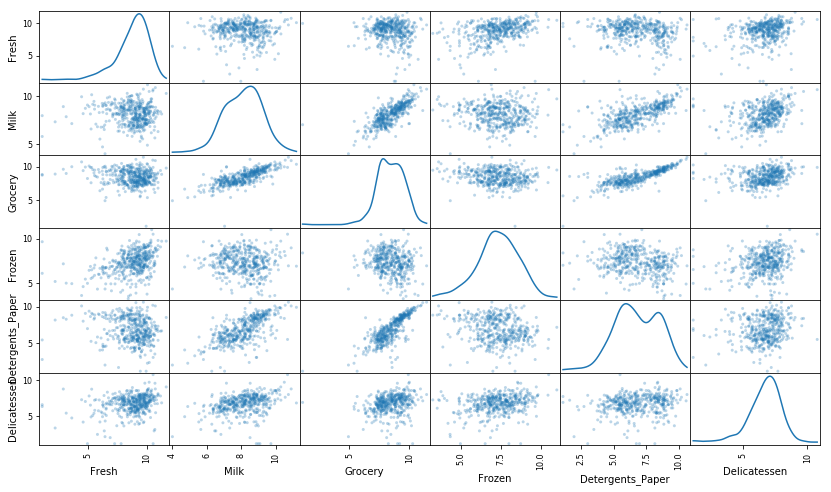

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.614138,7.286876,7.719130,6.304449,5.231109,6.013715
1,9.553930,7.664816,8.144679,7.197435,7.307202,6.306275
2,9.482960,9.142811,9.569133,8.052296,8.532870,7.546446


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values

# For programatic proposal of outliers
outliers_all_features  = []
# To sensor: The following URL is not available anymore:
# **   http://www.math.uconn.edu/~gan/ggpaper/gan2017kmor.pdf

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # Comment by Sten Ruben: for a real life project, I suppose I would use a somewhat smaller percentage:
    # maybe even below  20%. This is due to market adaptation for specialist shops. 
    # But in Tukey's Method, this will also have something to say also for the maximum-ouliers, 
    # so this need serious consideration or change of method before doing.
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    # Modification for programatic proposal
    outliers_ala_Tukey = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_ala_Tukey)
    
    # Extend the collection of ouliers: Add the outliers indices to outliers_all_features
    outliers_feature_list = list(outliers_ala_Tukey.index.values)
    #display(outliers_feature_list)
    outliers_all_features.extend(outliers_feature_list)
    #display(outliers_all_features)
    
    
# Count outliers, and make a distinct list as well
from collections import Counter

outliers_all_features_COUNTED = Counter(outliers_all_features)
#display(outliers_all_features_COUNTED)
outliers_all_features_DISTINCT = Counter(set(outliers_all_features))
#display(outliers_all_features_DISTINCT)

# Outliers in several features only
outliers_in_several_features_only = Counter((outliers_all_features_COUNTED - outliers_all_features_DISTINCT).keys())

print('\n Indices that are Tukey outliers in several features: \n', outliers_in_several_features_only)
print('\n Indices that hold the min value in at least one feature: \n', indices_as_min)
print('\n Indices that hold the max value in at least one feature: \n', indices_as_max)

# OPTIONAL: Select the indices for data points you wish to remove
outliers = list((outliers_in_several_features_only + indices_as_min + indices_as_max).keys())
print('\n Selected outliers are those with extreme values or several features outside Tukey''s step: \n', outliers)


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



 Indices that are Tukey outliers in several features: 
 Counter({65: 1, 66: 1, 128: 1, 154: 1, 75: 1})

 Indices that hold the min value in at least one feature: 
 Counter({75: 2, 95: 1, 109: 1, 128: 1, 142: 1, 154: 1, 161: 1, 187: 1, 338: 1, 420: 1})

 Indices that hold the max value in at least one feature: 
 Counter({85: 2, 86: 1, 181: 1, 183: 1, 325: 1})

 Selected outliers are those with extreme values or several features outside Tukeys step: 
 [65, 66, 128, 154, 75, 95, 109, 142, 161, 187, 338, 420, 85, 86, 181, 183, 325]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* More than one feature:
    - REMOVE: 65 is high on Fresh, low on Frozen
    
    - REMOVE: 66 is low on Fresh, high on Delicatessen. Delicatessen has very low prediction scores with respect to each of the other features, and thus imposing greater risk of disturbing the k-means.
    
    - KEEP: 75 is low on both Grocery and Detergents_Paper. Will not be removed, may be an example of market adaptation. NB: Grocery, Milk and Detergents_paper are among the products with more eliptical scatter plots. Therefore and after all, 75 may be counted to have extremes in only ONE unique component, another good reason NOT to remove it.
    
    - KEEP: 128 is somewhat high on Fresh, low on Delicatessen. But still, it plays well on the other products. As it is not a extremely high outlier on Fresh, I will keep it.
    
    - REMOVE: 154 is low on Milk, high on Grocery, low on Delicatessen. NB: Milk and Grocery are positively correlated, but 154 is low on one of the pair, and correspondingly high on its peer. So these occation does NOT count for reducing 3 extreme values into 2. Hence, 154 will be removed due to extreme values.
* k-means: Outliers witch are in the "high" category seems to me to be more prone to disturb the k-means clustering, as most of the data is right skewed. This justifies removal of 65 and 66, and even 154.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

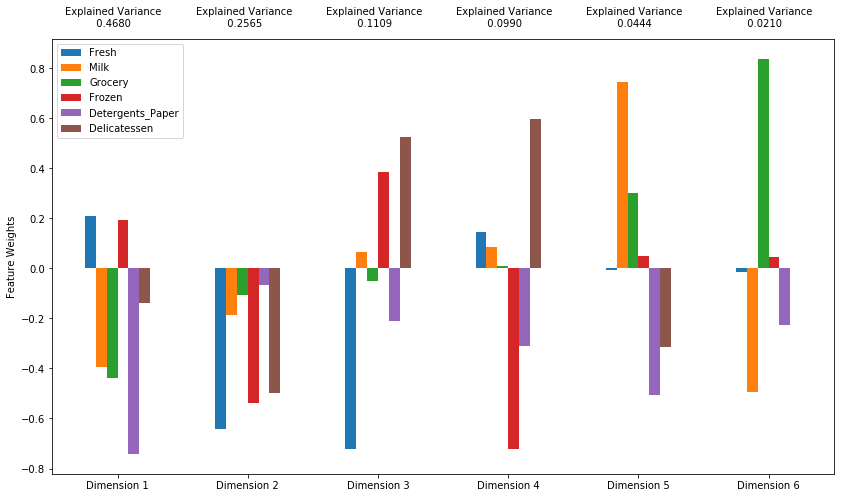

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
#display(pca_samples)
#display(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* Explained variance
    - Dimension variances:
        - PC1: 0.4680
        - PC2: 0.2565
        - PC3: 0.1109
        - PC4: 0.0990
        - PC5: 0.0444
        - PC6: 0.0210
    - The first 2 dimensions together count for 72% of the variance
    - The first 4 dimensions together count for 93% of the variance 


* Dominant features in each dimension: With all dimensions available, it is still possible to calculate the original values.

    - PC1: As described in Q3, Milk + Grocery + Detergent_Paper are highly correlated. 
        * PC1 is dominated by these 3 together, all with a negative weight on the features.
    
    - PC2, PC3 and PC4: PC2 got twice the variance of PC3 and PC4. 
    As described in Q2: Fresh and Delicatessen are the most unique features, and Frozen is quite unique.
        * PC2 is dominated by Fresh, supported by Frozen and Delicatessen. All similar sign proves that they have similar growth and reduction pattern.
        * PC3 is dominated by Delicatessen in combination with Fresh (positive vs negative, states that they are not 100% correlated in growth/reduction)
        * PC4 is dominated by Frozen in combination with Fresh (positive vs negative, states that they are not 100% correlated in growth/reduction)
    
    - PC5 and PC6: Among the more correlated features, there are differences that can adjust for a very little part of the variance:
        * PC5 is dominated by Milk, in combination with Detergents_Paper. Not similar in growth/reduction.
        * PC6 is dominated by Grocery, in combination with Milk. Not similar in growth/reduction.


* Customer spending, mainly on PC1-PC4. Described with examples from the Samples and how they are affected (See pca_samples below).
    * Sample[0] buy small amounts of all products. Hence PCA_Samples[0] has a sustantial positive coefficients in the negative dimensions PC1 and PC2.
    * Sample[1] buy average amounts of all products, except high on Fresh and low on Grocery. Hence PCA_Samples[1] has small coefficients in almost all dimensions, unless on PC3 and PC4 that are positive for Fresh. 
    * Sample[2] is an example of customer that buy much of almost eerything, except Fresh, Frozen and Delicatessen. Hence, PCA_Samples[2] is substantial and negative for all dimensions that are negative, unless positive for PC3 that is negative on Delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.6735,1.3295,-0.3209,0.6936,0.1463,0.1098
1,0.1259,-0.1556,-0.9311,-0.2409,-0.5489,-0.1557
2,-2.0149,-1.6952,-0.1237,-0.3632,0.0125,0.0772


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.6735,1.3295
1,0.1259,-0.1556
2,-2.0149,-1.6952


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

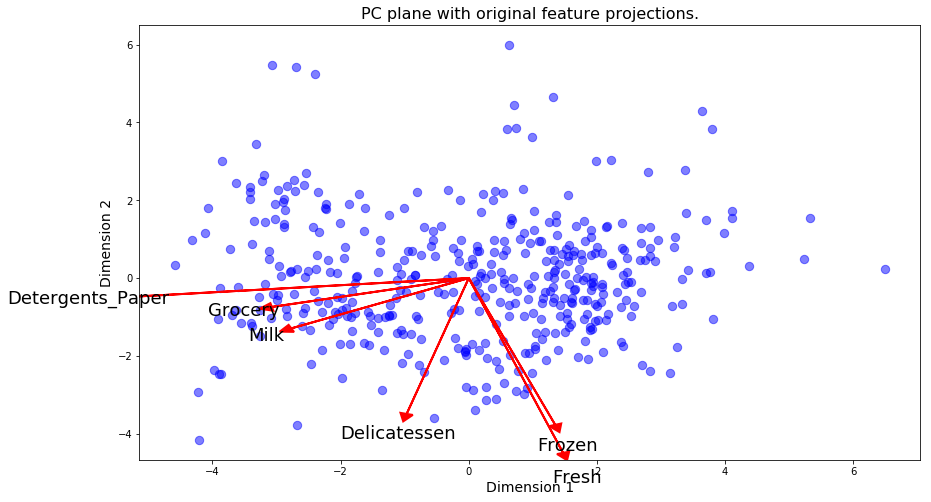

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* K-means clustering: 
    - Fast
    - Hard clustering: Tight clusters
* Gaussian Mixture Model: 
    - Produces not only spherical cluster
    - Soft clustering: Assigns a probability to each point to belong to all clusters
* My choice: 
    - Gaussian Mixture Model with default covariance_type='full' because:
        * the ability to form elliptical groups
        * soft clustering: As seen in the biplot visualization, there is no evident groups that stand out. With clearly separatable  groups, it would have been ideak for k-means, but this is not the case here. K-means could as well let one cluster-center claim almost all the indices.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn import mixture

# TODO: Apply your clustering algorithm of choice to the reduced data 
Clusters = 2

clusterer = mixture.GaussianMixture(n_components=Clusters, covariance_type='full', random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
#print(centers)

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
# https://classroom.udacity.com/nanodegrees/nd009-ent/parts/1fe3a0c2-ad65-45e2-ac6d-bdc4d7ed6d2c/modules/bdd0b531-4bd7-4e64-9926-c487fe564f09/lessons/a158c256-dbb5-4444-9a91-8f9679ed243d/concepts/9eb41da9-24a4-496d-986d-332780f61ecc
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
from sklearn import metrics
score = metrics.silhouette_score(reduced_data, preds)
print(score)

0.42748089031103403


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

| 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 20 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: 
| 0,415 | 0,345 | 0,299 | 0,274 | 0,299 | 0,306 | 0,224 | 0,299 | 0,254 | 0,283 | 0,311 |


Best Silhouette Score for 2 clusters



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

,Dimension 1,Dimension 2
0,1.6735,1.3295
1,0.1259,-0.1556
2,-2.0149,-1.6952


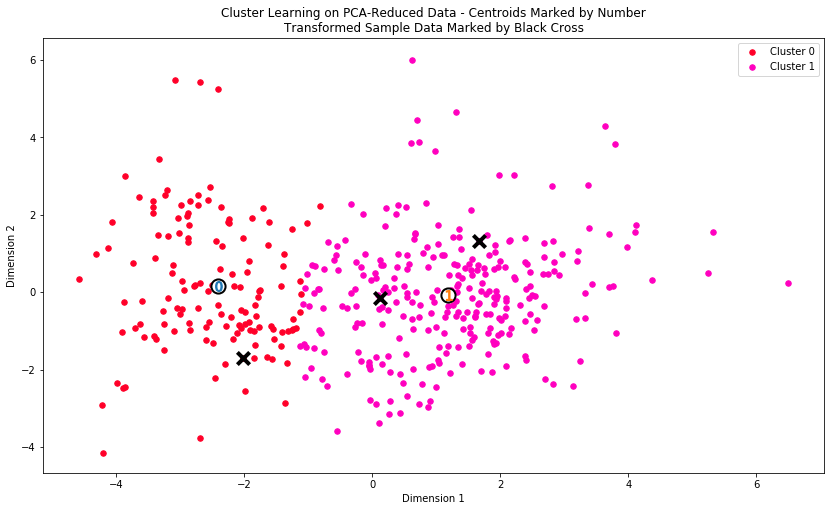

In [17]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# Modification: Repeat earlier sample identification, in order to be able to compare:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print('\n Offset from mean:')
display(-(np.around(data.mean().values)-true_centers))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3548.0,8266.0,12965.0,862.0,5311.0,1052.0
Segment 1,8807.0,2102.0,2771.0,1958.0,380.0,725.0



 Offset from mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8452.0,2470.0,5014.0,-2210.0,2430.0,-473.0
Segment 1,-3193.0,-3694.0,-5180.0,-1114.0,-2501.0,-800.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0 represents a customer that purchase 
* well below average on Fresh, Frozen and Delicatessen.  
* Still Milk, Grocery and Detergents_Paper are above average, these are also highly correlated as stated in Question2.
* Maybe Segment 0 represents grocery shops?

Segment 1 represents a customer that purchase
* below average on all products.
* Still Frozen is close to average
* Maybe Segment 1 represents hotels? 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Segment 0 is low on Fresh, Frozen and Delicatessen, above average on Milk, Grocery and Detergents_Paper. Maybe a grocery shop.
* Sample [0] purchase all products close to the 25% percentil (Low). Maybe a small shop. Prediction is correct for several products, but not all.
* Sample [1] buy average amounts of all products, except high on Fresh and low on Grocery. Maybe a restaurant. Intuitively, this prediction fells to be close to a tipping point, but from the Cluster Visualization this sample is safely within it's segment: Correct.

Segment 1 is low on all products, except Frozen that is closer to average. Maybe a hotel.
* Sample[2] purchase all products close to the 75% percentil (High), but Fresh, Frozen and Deliactessen is not very high. maybe a convenience store. Prediction does NOT feel correct, and seems to be close to a tipping point. Maybe a outlier from Segment0?

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

This case mentions only one alternative frequency, compared to the existing frequencu. In other words, there are two frequencies in question. Hence, this is an A/B test. If even more frequencies had been in question, this would have been called a multivariate test.

            ...
            Thoughts before running a A/B test:

- Conclude on prior tests
- Work with fresh segmentation, preferable only from the period after prior changes.
- Decide on how to measure changes. Measurements should be:
    - sensitive enough to avoid false negatives. Be aware of any effect of correlated products.
    - robust enough to avoid false positives: An initial A/A test (both control and experiment groups are exposed to the exact same change) can indicate robustness: If our metric moves across the two groups, then the metric is not robust enough.
            
            ...
            A setup for A/B test could be to introduce a frequency shift like this:

1) Shift the frequency for one product only. Product requirement in order to define comparable groups:
- most equally used within both segments
- agree on exposure: little exposure in PC1 indicates low risk, but outcome will possibly be more vague
- least correlation with other products

2) Requirement for selecting segments containing curtomers for the test
- Each eligible segment must have enough customers to make statistical proofs
- Preferably segments with dense population in the cluster visualization are eligible. Sparse density will give less robustness.

3) Requirements for selecting customers
- From each segment, we need a experiment group and a control group. 
- Create pairs of customers within each segment: 
    - Members of the experiment group should be compared to members in the control group that are MOST NEARBY in the cluster visualization. 
    - We need enough such pairs to get valid statistical proofs.

4) Monitor the result by performing interviews and measuring purchase in the groups affected (defined by product, segment and selection)



My proposal would be to introduce frequency shift on Delicatessen, in both segments:
- Similar distribution vs all other products in the scatter matrix
- Low exposure in PC1 (but still some in PC2, even though less than for Fresh). Risk for vague outcome is justified by the fact that I have excellent analytics tools ;-)
- Low prediction scores with respect to each of the other products. 
- Even distribution throuhout the scatter matrix tells me to test on all customers in the two groups (i.e. avoiding random selection to create small and comparable groups). In addition, this avoids costly measures in order to manage the delivery service.
- Fresh is more unique and more exposed in both PC1 and PC2, but is a more delicate product that will suffer from reduced delivery service.
- Both segments are dense enough to be eligible.

Cool reading:
https://towardsdatascience.com/what-i-learned-from-udacitys-course-on-a-b-testing-by-google-45f6d3297f42?gi=72428d5ecae9

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

All customers should at all time be associated with a set of engineered features: 
* Segment_ID
* Segmentation_Date (in order to keep track of each customer's journey through segments, and to decide on trends)

If this segmentation is performed by a clustering technique on the unlabeled data, a predictor in the same tool can determine an initial segment based on provided estimates:
* initial_prediction = clusterer.predict(product_estimates)

Maybe the new customer's initial segment should be quarantined for a while afterwards, in order to settle in and achieve the estimated purchase level. This will make as little noise as an alternative method, wich is to predetermine the new customer as an outlier.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

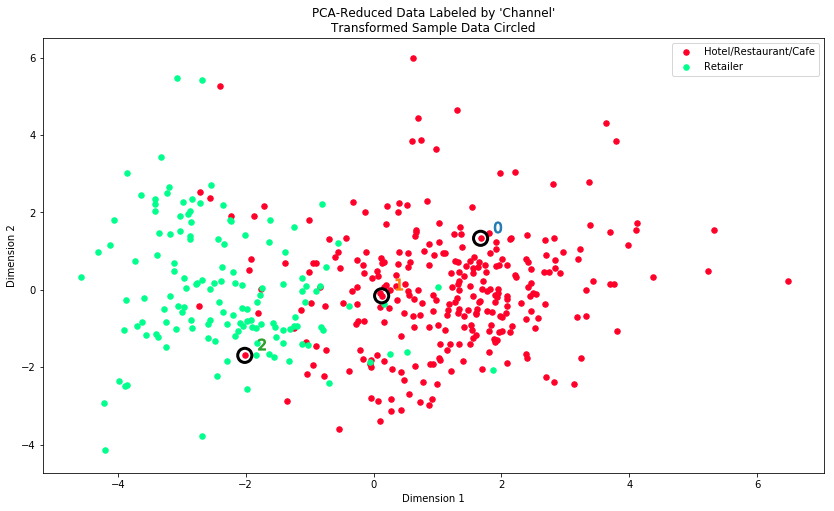

In [20]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

Clustering algorithm: 
* I chose to use CMM, and it seems to me to close to perfect, both in number of clusters and segmentation. 
    - Neither model would have been able to identify outliers from each segment.
    - Retrospective: After closer testing I can see that CMM covariance_type is better for the default 'full' and 'diag' than for 'tied' and 'spherical'


Pure classification: 
* Only a few HoReCa's have safe distance to any Retailer. Wery few Retailers have safe distance to any HoReCa.

Consistence with my previous definitions: 
* Ahaaa!!! My sample [2] is an outlier from HoReCa! :-D That's why I really spent time on wondering...


* My sample [0] and [1] were safer classifications, but with this last revealation I realize that [1] could as well been an outlier from Retail.
    * My pondering has made me realize that my method for selecting samples has forced me to select un-natural customers: 
        - I requested similar percentiles for every product, but a variation over the products is more natural. 
        - The PCA and CMM pays respect to the majority, and my samples may have been awkvards in their purity.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.